### This code provides the RF Feature Ranking figure for all the 9 groups. The target predicted is the dimensionless Halfmass Radius (R50/Rhalo).

In [1]:
import time
import numpy as np
import pandas as pd

import galsim #install with conda install -c conda_forge galsim

import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.cm as cm
import matplotlib.colors as norm
from matplotlib.gridspec import SubplotSpec
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
from sklearn.pipeline import make_pipeline #This allows one to build different steps together
from sklearn.preprocessing import StandardScaler, RobustScaler

from tqdm import tqdm 

import target_predicting_ML_functions_and_feature_ranking as functions
import RF_target_predicting_and_learning_curves_functions as tp_lc_functions

#### <font color='purple'> [Upload the RF Feature Ranking files for each of the 9 groups](#1)
#### <font color='purple'> [Plot the figure: Most important features of 9 groups in one plot](#2)
#### <font color='purple'> [ ](#3)


### <font color='darkviolet'> <a id =1> </a> <br> Upload the RF Feature Ranking files for each of the 9 groups

In [2]:
import os
# os.mkdir('TNG300-SAM_images/v14_FeatRank_9Groupsin1')

In [3]:
# 17 most imp features, choose the first 10 for Groups 1 to 3
gr1_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v5_TNG300-SAM_wo_DISKgals_w_smallfdisk_wspineff/v5_TNG300_wspineff_Group_1_Max_r_scores_by_add_column_method.csv')


gr2_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_2/v7_TNG300_Group_2_Max_r_scores_by_add_column_method.csv')

gr3_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_3/v7_TNG300_Group_3_Max_r_scores_by_add_column_method.csv')

# 10 most imp feature from here on
gr4_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_4/v7_TNG300_Group_4_Max_r_scores_by_add_column_method.csv')

gr5_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_5/v7_TNG300_Group_5_Max_r_scores_by_add_column_method.csv')

gr6_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_6/v7_TNG300_Group_6_Max_r_scores_by_add_column_method.csv')

gr7_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_7/v7_TNG300_Group_7_Max_r_scores_by_add_column_method.csv')

gr8_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_8/v7_TNG300_Group_8_Max_r_scores_by_add_column_method.csv')

gr9_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_9/v7_TNG300_Group_9_Max_r_scores_by_add_column_method.csv')

gr14_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_14/v7_TNG300_Group_14_Max_r_scores_by_add_column_method.csv')

gr58_featrank = pd.read_csv('/Users/festabu/Desktop/ML_galaxy_size_project/Codes/TNG300-SAM_images/v7_TNG300-SAM_df_58/v7_TNG300_Group_58_Max_r_scores_by_add_column_method.csv')

### <font color='darkviolet'> <a id =2> </a> <br> Plot the figure: Most important features of 9 groups in one plot

In [4]:
number_features = 5
list_features = []

datasets = [gr1_featrank, gr2_featrank,gr3_featrank,gr4_featrank,gr5_featrank,gr6_featrank,gr7_featrank,gr8_featrank,gr9_featrank] 

datasets_names = [str(l) for l in range(1,10)]

all_top_n_feats = []

for i, _dataset in enumerate(datasets):
    all_top_n_feats.extend(list(_dataset.loc[:number_features-1,'features'].values))
    all_top_n_feats = list(set(all_top_n_feats))
    

In [5]:
all_top_n_feats

['GalpropNormMcold',
 'GalpropNormSigmaBulge',
 'GalpropNormMHII',
 'HalopropC_nfw',
 'GalpropNormMHI',
 'HalopropMaccdot_radio',
 'HalopropSpin',
 'GalpropSfr',
 'GalpropNormMstar',
 'GalpropMu_merger']

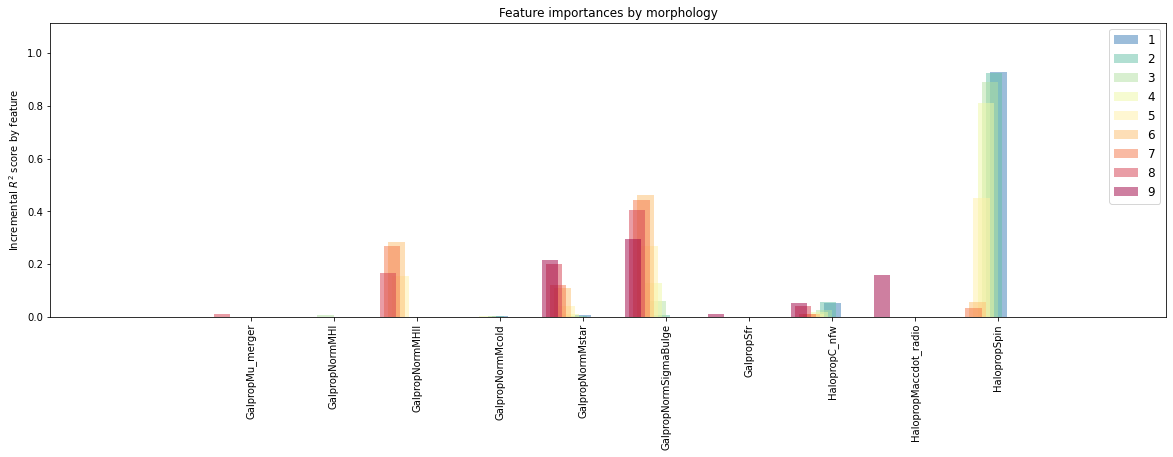

In [24]:
# Plot the feature importances of three models

plt.figure(figsize=(20,6))

plt.title("Feature importances by morphology")

for i, _dataset in enumerate(datasets):
    dataset = _dataset.copy()
    
    dataset.loc[1:,'r_sq_score'] = dataset.loc[:,'r_sq_score'].diff()[1:]

    importances = dataset.loc[:number_features -1, 'r_sq_score']
    importances.index = dataset.loc[:number_features-1,'features']
    
    
    for l in [l for l in all_top_n_feats if l not in importances.index]:
        importances[l] = 0
        
    importances.sort_index(inplace=True)
    color_list = cm.Spectral_r(30*i+20)
#     print(color_list)
    plt.bar(np.arange(len(importances))+0.05*(-i), importances, 
        align="center", width=0.2, alpha = 0.5, label = datasets_names[i], 
        color = color_list)
    
    plt.xticks(range(len(list(importances.index))), labels = list(importances.index), rotation=90)
    # Pad margins so that markers don't get clipped by the axes
    plt.margins(0.2)
    plt.ylabel(r'Incremental $R^{2}$ score by feature')

    plt.legend(fontsize = 12)  
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.2)
    
# plt.savefig('TNG300-SAM_images/v14_FeatRank_9Groupsin1/FeatImp_v2.jpeg', dpi=500)
    

In [221]:
color_bar = pyplot.colormaps['Spectral_r']

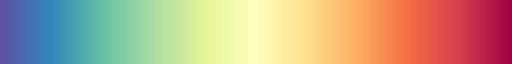

In [227]:
color_bar

In [237]:
color1 = cm.Spectral_r(0)

In [238]:
color1

(0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)

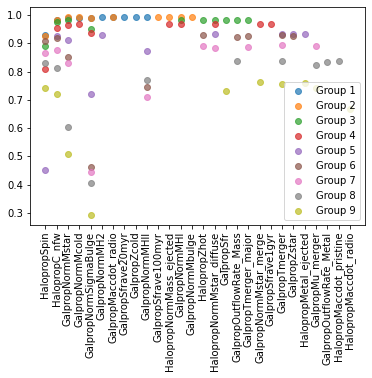

In [55]:
plt.scatter(gr1_featrank[0:10].features, gr1_featrank[0:10].r_sq_score, label='Group 1', alpha=0.7 )
plt.xticks(rotation=90)
plt.scatter(gr2_featrank[0:10].features, gr2_featrank[0:10].r_sq_score, label='Group 2', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr3_featrank[0:10].features, gr3_featrank[0:10].r_sq_score, label='Group 3', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr4_featrank.features, gr4_featrank.r_sq_score, label='Group 4', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr5_featrank.features, gr5_featrank.r_sq_score, label='Group 5', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr6_featrank.features, gr6_featrank.r_sq_score, label='Group 6', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr7_featrank.features, gr7_featrank.r_sq_score, label='Group 7', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr8_featrank.features, gr8_featrank.r_sq_score, label='Group 8', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr9_featrank.features, gr9_featrank.r_sq_score, label='Group 9', alpha=0.7)
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.show()

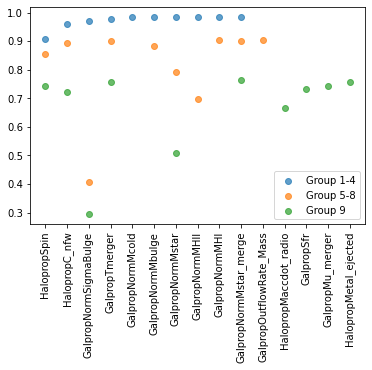

In [58]:
plt.scatter(gr14_featrank.features, gr14_featrank.r_sq_score, label='Group 1-4', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr58_featrank.features, gr58_featrank.r_sq_score, label='Group 5-8', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr9_featrank.features, gr9_featrank.r_sq_score, label='Group 9', alpha=0.7)
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.show()

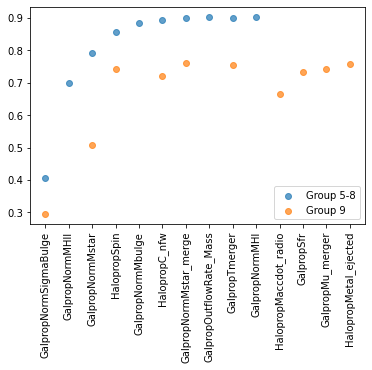

In [61]:
plt.scatter(gr58_featrank.features, gr58_featrank.r_sq_score, label='Group 5-8', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr9_featrank.features, gr9_featrank.r_sq_score, label='Group 9', alpha=0.7)
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.show()

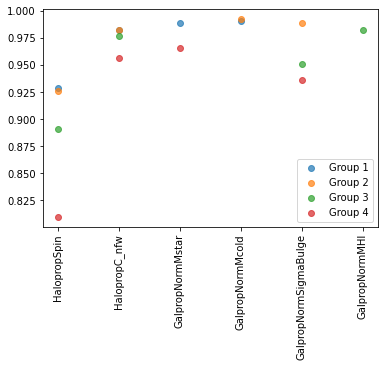

In [67]:
plt.scatter(gr1_featrank[0:4].features, gr1_featrank[0:4].r_sq_score, label='Group 1', alpha=0.7 )
plt.xticks(rotation=90)
plt.scatter(gr2_featrank[0:4].features, gr2_featrank[0:4].r_sq_score, label='Group 2', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr3_featrank[0:4].features, gr3_featrank[0:4].r_sq_score, label='Group 3', alpha=0.7)
plt.xticks(rotation=90)
plt.scatter(gr4_featrank[0:4].features, gr4_featrank[0:4].r_sq_score, label='Group 4', alpha=0.7)
plt.xticks(rotation=90)
plt.legend(loc='lower right')
plt.show()

Q: What if MHI and Mcold are feature engineered into one?